In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#функция для отрисвки тепловой карты
#нужно указать центр окружности = (x,y) и радиус окружности = R
def plot_circle1(x,y,r):
    angles = np.linspace(0,2*np.pi,100)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.fill_between(x_cir, y_cir)

In [48]:
#функция для отрисвки окрудности (т.е траектории движении дрона)
#нужно указать центр окружности = (x,y) и радиус окружности = R
def plot_circle(x,y,r):
    angles = np.linspace(0,2*np.pi,100)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.plot(x_cir,y_cir,color = '#EEE8AA')

In [49]:
#функция для отрисвки области покрытия дрона
#нужно указать центр окружности = (x,y) и радиус окружности = R
def plot_drone_round(x,y,r):
    angles = np.linspace(0,2*np.pi,100)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.plot(x_cir,y_cir,color = 'green')

In [50]:
# функция для создания массивов X,Y положения дрона в i-ый момент времни
def traektory(x,y,r,iterations):
    angles = np.linspace(0,2*np.pi,iterations)
    X=[]
    Y=[]
    for i in range(len(angles)):
        x_cir=x+r*np.cos(angles[i])
        y_cir=y+r*np.sin(angles[i])
        X.append(x_cir)
        Y.append(y_cir)
    return X,Y

In [51]:
# функция для расчета растояния между дроном и пользователем
def distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

In [52]:
N = 100 # число пользователей
a = 0 # левая граница рассматриваемой области в км
b = 1 # правая граница рассматриваемой области в км

In [53]:
# Задаем координаты N пользователей (равномерное распределение [a,b])
x_user=np.random.uniform(a,b,N)
y_user=np.random.uniform(a,b,N)

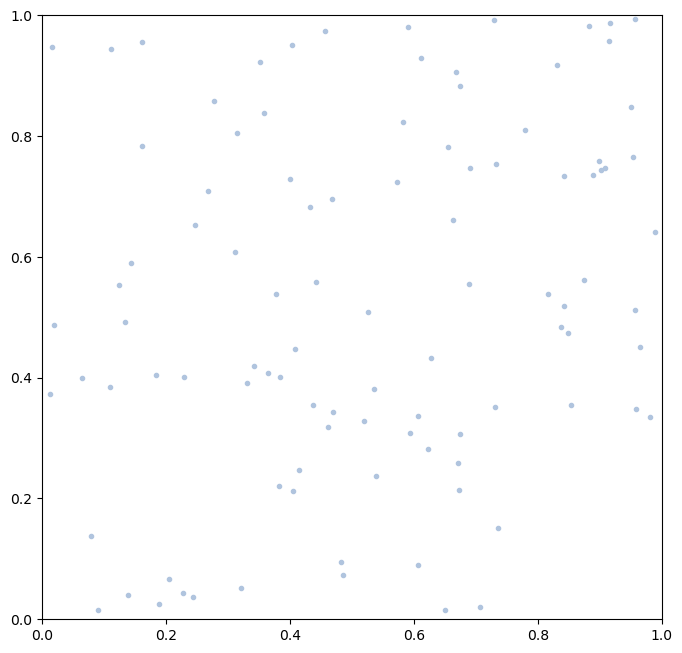

In [54]:
# Отрисовываем расположение пользователей на области
plt.figure(dpi=100,figsize=(8,8))
plt.plot(x_user,y_user,'.',color='LightSteelBlue')
plt.xlim(a,b)
plt.ylim(a,b)
plt.show()

In [55]:
R = 0.1  # радиус покрытия дрона в км 0.2755104213993242
R_traektory = (b+a)/2 - R # радиус траектории движении дрона, при которой достигается оптимальная траетория движения
X_traektory = (b+a)/2 # координата x центра для траетории
Y_traektory = (b+a)/2 # координата y центра для траетории

In [56]:
traektory_len = 2*np.pi*R_traektory # длина траетории в км
drone_speed = 15*10**-3 # скорость дрона в метрах
iterations = round(traektory_len/drone_speed) # колличество итераций 

In [57]:
# заполняем массивы X,Y положения дрона в i-ый момент времни 
X,Y=traektory(X_traektory,Y_traektory,R_traektory,iterations)
print(X[0],Y[0])

0.9 0.5


In [58]:
# блок для вычисления и заполнения массива покрытых пользователей в момент времени i
covered_users=[] # задаем список, который будет хранить количство покрытых пользователей в момент времни i
sir_users=np.array([0]*N) # задаем список, который будет вычислять SIR i - ого пользователя
for j in range (len(X)):
    covered = 0
    for i in range (len(x_user)):
        if distance(x_user[i],y_user[i],X[j],Y[j])<=R: # проверяем условие обслуживания
            covered += 1
            sir_users[i] += 1
    covered_users.append(covered)

Text(0.5, 1.0, 'Круговая траетория')

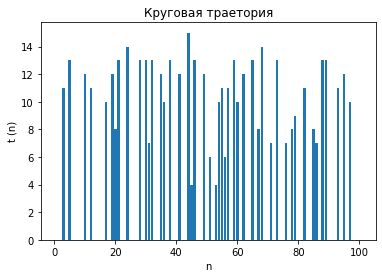

In [59]:
plt.bar([i for i in range(1,101)],sir_users)
plt.xlabel('n')
plt.ylabel('t (n)')
plt.title('Круговая траетория')

Text(0.5, 1.0, 'Круговая траетория')

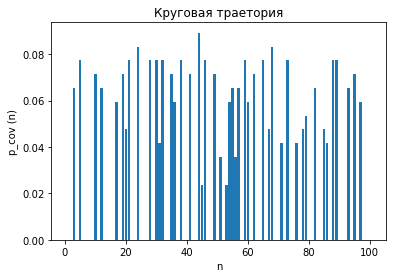

In [60]:
plt.bar([i for i in range(1,101)],sir_users/iterations)
plt.xlabel('n')
plt.ylabel('p_cov (n)')
plt.title('Круговая траетория')

mean = 2.9047619047619047


Text(0.5, 1.0, 'Круговая траетория')

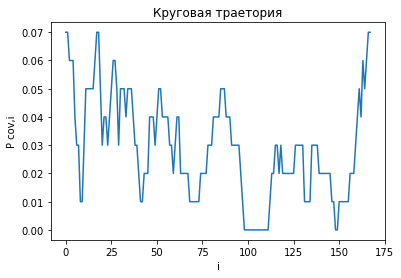

In [61]:
covered_users_copy = np.copy(covered_users)
covered_users_copy = [i/N for i in covered_users_copy]
plt.plot(range(len(X)),covered_users_copy) # график числа покрытых пользователей
mean = np.mean(covered_users) # математическео ожидание покрытых пользователей
print(f'mean = {mean}')
plt.xlabel('i')
plt.ylabel('P cov,i')
plt.title('Круговая траетория')

In [62]:
sir_users/iterations

array([0.        , 0.        , 0.06547619, 0.        , 0.07738095,
       0.        , 0.        , 0.        , 0.        , 0.07142857,
       0.        , 0.06547619, 0.        , 0.        , 0.        ,
       0.        , 0.05952381, 0.        , 0.07142857, 0.04761905,
       0.07738095, 0.        , 0.        , 0.08333333, 0.        ,
       0.        , 0.        , 0.07738095, 0.        , 0.07738095,
       0.04166667, 0.07738095, 0.        , 0.        , 0.07142857,
       0.05952381, 0.        , 0.07738095, 0.        , 0.        ,
       0.07142857, 0.        , 0.        , 0.08928571, 0.02380952,
       0.07738095, 0.        , 0.        , 0.07142857, 0.        ,
       0.03571429, 0.        , 0.02380952, 0.05952381, 0.06547619,
       0.03571429, 0.06547619, 0.        , 0.07738095, 0.05952381,
       0.        , 0.07142857, 0.        , 0.        , 0.07738095,
       0.        , 0.04761905, 0.08333333, 0.        , 0.        ,
       0.04166667, 0.        , 0.07738095, 0.        , 0.     

In [63]:
moment = int(input(f'Выбирете момент времени от 0 до {len(X)-1} : '))

Выбирете момент времени от 0 до 167 : 45


Text(0.5, 1.0, 'Time: 45')

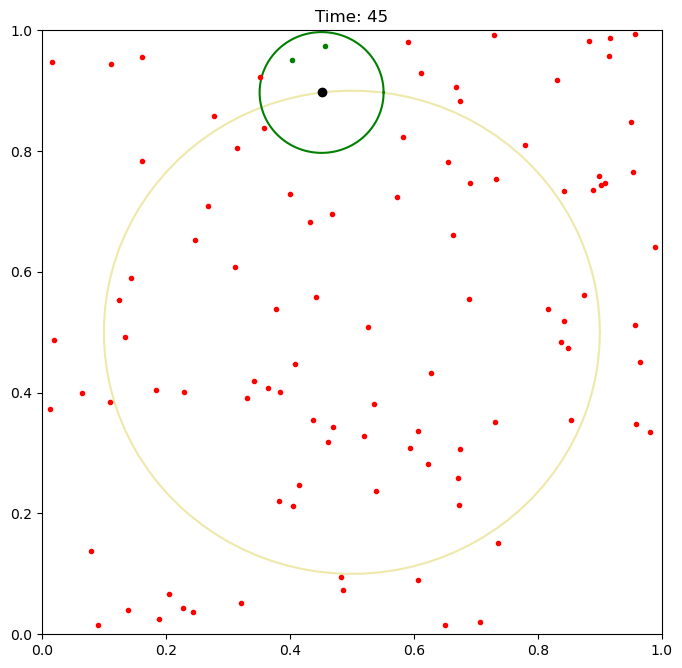

In [64]:
plt.figure(dpi=100,figsize=(8,8))
plt.xlim(a,b) #прописать границы области моделирования в ручную
plt.ylim(a,b) #прописать границы области моделирования в ручную
plot_circle(X_traektory,Y_traektory,R_traektory)
#рисуем точку доступа - дрон 
plt.plot(X[moment],Y[moment],'o',color='black')
#рисуем область покрытия дрона
plot_drone_round(X[moment],Y[moment],R)
for i in range (len(x_user)):
    if distance(x_user[i],y_user[i],X[moment],Y[moment])<=R:
        plt.plot(x_user[i],y_user[i],'.',color='green') 
    else:
        plt.plot(x_user[i],y_user[i],'.',color='red')

plt.title('Time: '+str(moment) )

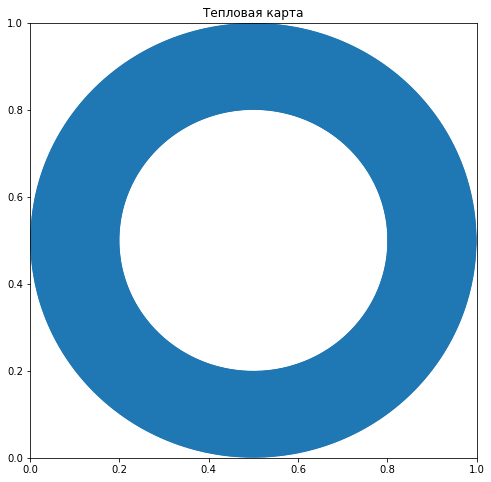

In [65]:
figure, axes = plt.subplots(figsize=(8,8))
plt.xlim(a,b) #прописать границы области моделирования в ручную
plt.ylim(a,b) #прописать границы области моделирования в ручную
for j in range (len(X)):
    Drawing_colored_circle = plt.Circle(( X[j] ,Y[j] ), R )
    axes.add_artist( Drawing_colored_circle )
plt.title( 'Тепловая карта' )

plt.show()

In [66]:
#!!!!!!!!!!
# процесс создания гиф изображения
# не выполнять без необходимости, т.к.ваш ПК будет думать минут 10 - 20 
screen=[]
covered_users=[]
for j in range (len(X)):
    aa=plt.figure(dpi=100,figsize=(8,8))    
    plt.xlim(a,b)
    plt.ylim(a,b) 
    plot_circle(X_traektory,Y_traektory,R_traektory)
    #рисуем точку доступа - дрон 
    plt.plot(X[j],Y[j],'o',color='black')
    #рисуем область покрытия дрона
    plot_drone_round(X[j],Y[j],R)
    covered = 0
    for i in range (len(x_user)):
        if distance(x_user[i],y_user[i],X[j],Y[j])<=R:
            plt.plot(x_user[i],y_user[i],'.',color='green') 
            covered +=1
        else:
            plt.plot(x_user[i],y_user[i],'.',color='red')
    covered_users.append(covered)

    plt.title('Time: '+str(j) )
    screen.append(aa)
    plt.close()
    print(j)
    
import os
import imageio

screen_name=[]
for i in range (len(screen)):
    screen[i].savefig(str(i)+'saved_figure.png') 
    screen_name.append(str(i)+'saved_figure.png')
    print(i)
    
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in screen_name:
        image = imageio.imread(filename)
        writer.append_data(image)
        print(filename)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
